CHECK GPUs

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


TRYING KERAS

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[10]])

In [7]:
len(word_index)

88584

In [23]:
(train_data1, train_labels1), (test_data1, test_labels1) = imdb.load_data()

decoded_review1 = ' '.join(
[reverse_word_index.get(i-3, '?') for i in train_data1[10]])

In [7]:
print('Index:' + str(word_index['you']) + '\n' +
'Word: ' + reverse_word_index[22])

Index:22
Word: you


In [24]:
decoded_review1

"? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and switchblade romance bursting on to the scene maléfique preceded the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made maléfique was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is complimented by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named carrère sent to prison for fraud he is put in a cell with three others the quietly insane lassalle body building transvestite marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old journal after translating part of it they soon realise its magical powe

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
%time
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model_json = model.to_json()

In [15]:
%store model_json

Stored 'model_json' (str)


In [18]:
from keras.models import model_from_json

model1 = model_from_json(model_json)

In [19]:
model1

In [20]:
model

In [21]:
model

In [22]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [23]:
model1.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [24]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [25]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [26]:
%time
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 14.8 µs
Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.5074 - acc: 0.8143 - val_loss: 0.3941 - val_acc: 0.8716
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3114 - acc: 0.9024 - val_loss: 0.3056 - val_acc: 0.8908
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2273 - acc: 0.9263 - val_loss: 0.2982 - val_acc: 0.8817
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1798 - acc: 0.9402 - val_loss: 0.2803 - val_acc: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1477 - acc: 0.9521 - val_loss: 0.2863 - val_acc: 0.8835
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1215 - acc: 0.9629 - val_loss: 0.3019 - val_acc: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1019 - acc: 0.9691 - val_loss: 0.3052 - val_acc: 0.8841
Epoch 8/20
30/30 [=

In [27]:
history_dict = history.history

In [28]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [29]:
history_dict['loss']

[0.507388710975647,
 0.3114309012889862,
 0.22725968062877655,
 0.1798059046268463,
 0.14772814512252808,
 0.12154563516378403,
 0.10191794484853745,
 0.08571851253509521,
 0.0684610903263092,
 0.05869603529572487,
 0.045638397336006165,
 0.04062031954526901,
 0.029698649421334267,
 0.02587774209678173,
 0.02074485830962658,
 0.017427334561944008,
 0.011508666910231113,
 0.010393871925771236,
 0.007953597232699394,
 0.004796254448592663]

In [30]:
history_dict['acc']

[0.8142666816711426,
 0.902400016784668,
 0.9263333082199097,
 0.9401999711990356,
 0.9520666599273682,
 0.9628666639328003,
 0.9691333174705505,
 0.9751999974250793,
 0.9811333417892456,
 0.9841333627700806,
 0.9888666868209839,
 0.9908000230789185,
 0.9940666556358337,
 0.9950666427612305,
 0.9957333207130432,
 0.9968000054359436,
 0.9989333152770996,
 0.9992666840553284,
 0.9994666576385498,
 0.9998000264167786]

In [31]:
history_dict['val_acc']

[0.8715999722480774,
 0.8907999992370605,
 0.8816999793052673,
 0.8877000212669373,
 0.8834999799728394,
 0.8840000033378601,
 0.8841000199317932,
 0.8784999847412109,
 0.8813999891281128,
 0.8792999982833862,
 0.8774999976158142,
 0.8650000095367432,
 0.8730000257492065,
 0.8730000257492065,
 0.871399998664856,
 0.8689000010490417,
 0.8673999905586243,
 0.8677999973297119,
 0.8657000064849854,
 0.862500011920929]

In [33]:
history_dict['val_loss']

[0.39406606554985046,
 0.3056005537509918,
 0.29816585779190063,
 0.28027263283729553,
 0.2863292098045349,
 0.301932156085968,
 0.30518677830696106,
 0.34512048959732056,
 0.348164439201355,
 0.3703230619430542,
 0.40124326944351196,
 0.459956556558609,
 0.4581405222415924,
 0.48581308126449585,
 0.516986072063446,
 0.5533846616744995,
 0.5905640721321106,
 0.6146909594535828,
 0.6589166522026062,
 0.7195543646812439]

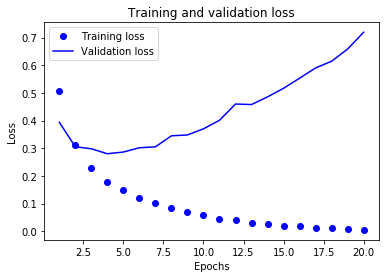

In [35]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

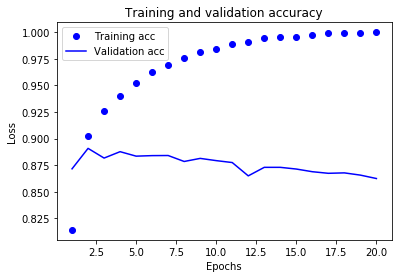

In [37]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

OVERFITTING, LET'S TRAIN WITH 3 EPOCHS ITERATIONS

In [38]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 20ms/step - loss: 0.4561 - accuracy: 0.8134
Epoch 2/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2611 - accuracy: 0.9105
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2011 - accuracy: 0.9279
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3016 - accuracy: 0.8806


In [39]:
results

[0.3016408085823059, 0.8805599808692932]

In [40]:
model.predict(x_test)

array([[0.18258789],
       [0.9993364 ],
       [0.66790813],
       ...,
       [0.09088755],
       [0.04207936],
       [0.45591158]], dtype=float32)

# **Hold Out Validation**

In [ ]:
'''
num_validation_samples = 10000
np.random.shuffle(data)
validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]
training_data = data[:]
model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)
# At this point you can tune your model,
# retrain it, evaluate it, tune it again...
model = get_model()
model.train(np.concatenate([training_data,
validation_data]))
test_score = model.evaluate(test_data)
'''

# **K-fold Cross Validation**

In [ ]:
'''
k = 4
num_validation_samples = len(data) // k

np.random.shuffle(data)

validation_scores = []

for fold in range(k):
    validation_data = data[num_validation_samples * fold:
        num_validation_samples * (fold + 1)]
    training_data = data[:num_validation_samples * fold] +
        data[num_validation_samples * (fold + 1):]
    model = get_model()
    model.train(training_data)
    validation_score = model.evaluate(validation_data)
    validation_scores.append(validation_score)

validation_score = np.average(validation_scores)
model = get_model()
model.train(data)
test_score = model.evaluate(test_data)
'''

# **Iterated K-Fold Validation with Shuffling**
This one is for situations in which you have relatively little data available and you need
to evaluate your model as precisely as possible. I’ve found it to be extremely helpful in
Kaggle competitions. It consists of applying K -fold validation multiple times, shuffling
the data every time before splitting it K ways. The final score is the average of the
scores obtained at each run of K -fold validation. Note that you end up training and
evaluating P × K models (where P is the number of iterations you use), which can very
expensive.

# OVERFITTING AND UNDERFITTING RESOLUTIONS
## Network size modifications

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[10]])

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Original model

In [6]:
%time
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

CPU times: user 8 µs, sys: 1 µs, total: 9 µs
Wall time: 17.9 µs


### Model with a smaller layer size

In [8]:
%time
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10.5 µs


### Model with a bigger layer size

In [7]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

## Evaluating the three models

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [10]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
%time
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs
Epoch 1/20
30/30 [==============================] - 1s 49ms/step - loss: 0.4958 - accuracy: 0.7865 - val_loss: 0.3626 - val_accuracy: 0.8749
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2841 - accuracy: 0.9088 - val_loss: 0.2958 - val_accuracy: 0.8845
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2148 - accuracy: 0.9271 - val_loss: 0.2757 - val_accuracy: 0.8909
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1636 - accuracy: 0.9486 - val_loss: 0.2755 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1355 - accuracy: 0.9560 - val_loss: 0.2855 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1132 - accuracy: 0.9657 - val_loss: 0.3197 - val_accuracy: 0.8786
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0931 - accuracy

In [12]:
history_dict = history.history

In [13]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
%time
smaller_model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])
smaller_history = smaller_model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

CPU times: user 20 µs, sys: 4 µs, total: 24 µs
Wall time: 42.7 µs
Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6107 - accuracy: 0.6424 - val_loss: 0.5612 - val_accuracy: 0.7210
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5140 - accuracy: 0.8031 - val_loss: 0.5119 - val_accuracy: 0.8150
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4635 - accuracy: 0.8644 - val_loss: 0.4828 - val_accuracy: 0.8683
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4265 - accuracy: 0.8995 - val_loss: 0.4607 - val_accuracy: 0.8686
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3961 - accuracy: 0.9204 - val_loss: 0.4573 - val_accuracy: 0.8456
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3707 - accuracy: 0.9342 - val_loss: 0.4337 - val_accuracy: 0.8784
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3475 - accura

In [15]:
smaller_history_dict = smaller_history.history

In [16]:
smaller_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
%time
bigger_model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])
bigger_history = bigger_model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 13.6 µs
Epoch 1/20
30/30 [==============================] - 5s 159ms/step - loss: 0.5433 - accuracy: 0.7615 - val_loss: 0.3468 - val_accuracy: 0.8557
Epoch 2/20
30/30 [==============================] - 5s 159ms/step - loss: 0.2469 - accuracy: 0.9045 - val_loss: 0.2863 - val_accuracy: 0.8839
Epoch 3/20
30/30 [==============================] - 5s 160ms/step - loss: 0.1473 - accuracy: 0.9439 - val_loss: 0.4135 - val_accuracy: 0.8617
Epoch 4/20
30/30 [==============================] - 5s 157ms/step - loss: 0.0837 - accuracy: 0.9730 - val_loss: 0.4215 - val_accuracy: 0.8789
Epoch 5/20
30/30 [==============================] - 5s 158ms/step - loss: 0.0988 - accuracy: 0.9760 - val_loss: 0.3352 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 5s 157ms/step - loss: 0.0052 - accuracy: 0.9995 - val_loss: 0.4918 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 5s 158ms/step - loss: 8.3394e-04

In [18]:
bigger_history_dict = bigger_history.history

In [19]:
bigger_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

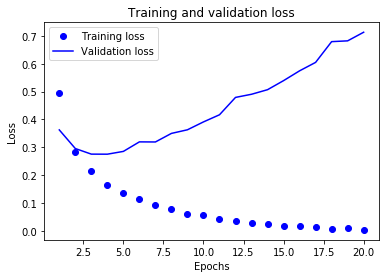

In [20]:
# Model loss plot

import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

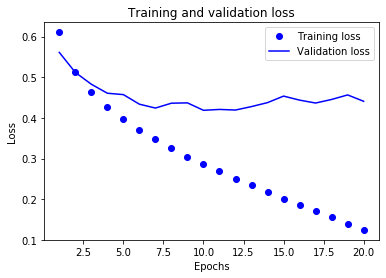

In [24]:
#Smaller model loss plot

import matplotlib.pyplot as plt

smaller_loss_values = smaller_history_dict['loss']
smaller_val_loss_values = smaller_history_dict['val_loss']
smaller_epochs = range(1, len(smaller_history_dict['accuracy']) + 1)

plt.plot(smaller_epochs, smaller_loss_values, 'bo', label='Training loss')
plt.plot(smaller_epochs, smaller_val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

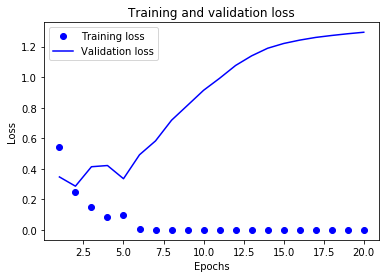

In [21]:
#Bigger model loss plot

import matplotlib.pyplot as plt

bigger_loss_values = bigger_history_dict['loss']
bigger_val_loss_values = bigger_history_dict['val_loss']
bigger_epochs = range(1, len(bigger_history_dict['accuracy']) + 1)

plt.plot(bigger_epochs, bigger_loss_values, 'bo', label='Training loss')
plt.plot(bigger_epochs, bigger_val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

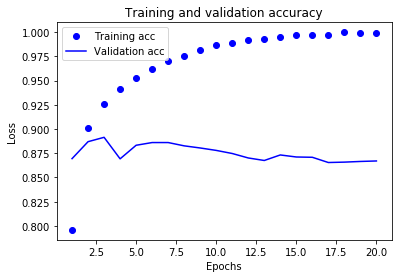

In [53]:
# VALID PLOT

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

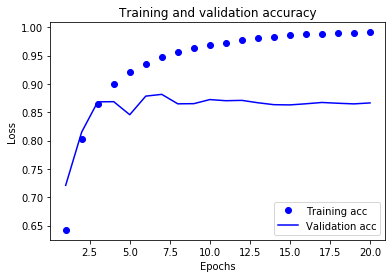

In [26]:
# VALID PLOT SMALLER MODEL

smaller_acc_values = smaller_history_dict['accuracy']
smaller_val_acc_values = smaller_history_dict['val_accuracy']
plt.plot(smaller_epochs, smaller_history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(smaller_epochs, smaller_history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

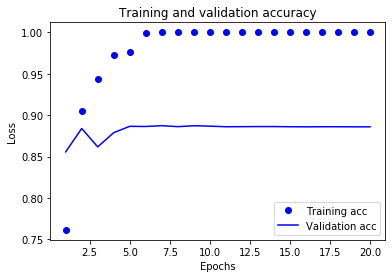

In [25]:
# VALID PLOT BIGGER MODEL

bigger_acc_values = bigger_history_dict['accuracy']
bigger_val_acc_values = bigger_history_dict['val_accuracy']
plt.plot(bigger_epochs, bigger_history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(bigger_epochs, bigger_history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Weight Regularization
A simple model in this context is a model where the distribution of parameter values
has less entropy (or a model with fewer parameters, as you saw in the previous sec-
tion). Thus a common way to mitigate overfitting is to put constraints on the complex-
ity of a network by forcing its weights to take only small values, which makes the
distribution of weight values more regular. This is called weight regularization, and it’s
done by adding to the loss function of the network a cost associated with having large
weights. This cost comes in two flavors:
* L1 regularization—The cost added is proportional to the absolute value of the weight coefficients (the L1 norm of the weights).
* L2 regularization—The cost added is proportional to the square of the value of the weight coefficients (the L2 norm of the weights). L2 regularization is also called weight decay in the context of neural networks. Don’t let the different name confuse you: weight decay is mathematically the same as L2 regularization.

In Keras, weight regularization is added by passing weight regularizer instances to layers
as keyword arguments. Let’s add L2 weight regularization to the movie-review classifi-
cation network.

In [27]:
%time

from keras import models
from keras import layers
from keras import regularizers

reg_model = models.Sequential()
reg_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
    activation='relu', input_shape=(10000,)))
reg_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
    activation='relu'))
reg_model.add(layers.Dense(1, activation='sigmoid'))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


l2(0.001) means every coefficient in the weight matrix of the layer will add 0.001 *
weight_coefficient_value to the total loss of the network. Note that because this
penalty is only added at training time, the loss for this network will be much higher at
training than at test time.

In [28]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [29]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [30]:
%time
reg_model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])
reg_history = reg_model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 19.1 µs
Epoch 1/20
30/30 [==============================] - 1s 43ms/step - loss: 0.5463 - accuracy: 0.7832 - val_loss: 0.4138 - val_accuracy: 0.8669
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3467 - accuracy: 0.9014 - val_loss: 0.3727 - val_accuracy: 0.8666
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2842 - accuracy: 0.9228 - val_loss: 0.3430 - val_accuracy: 0.8847
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2477 - accuracy: 0.9334 - val_loss: 0.3365 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2254 - accuracy: 0.9445 - val_loss: 0.4108 - val_accuracy: 0.8559
Epoch 6/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2133 - accuracy: 0.9467 - val_loss: 0.3356 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2021 - accuracy

In [31]:
reg_history_dict = reg_history.history

In [32]:
reg_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

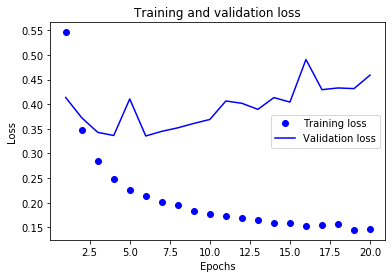

In [33]:
# Model loss plot

import matplotlib.pyplot as plt

reg_loss_values = reg_history_dict['loss']
reg_val_loss_values = reg_history_dict['val_loss']
reg_epochs = range(1, len(reg_history_dict['accuracy']) + 1)

plt.plot(reg_epochs, reg_loss_values, 'bo', label='Training loss')
plt.plot(reg_epochs, reg_val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

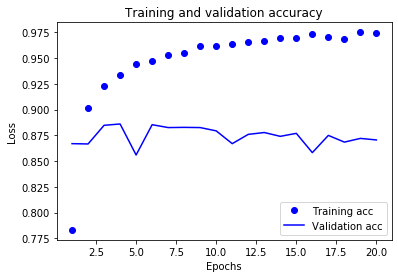

In [34]:
# VALID PLOT

reg_acc_values = reg_history_dict['accuracy']
reg_val_acc_values = reg_history_dict['val_accuracy']
plt.plot(reg_epochs, reg_history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(reg_epochs, reg_history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Tipi di regolarizzatori

In [35]:
from keras import regularizers
#L1 regularization
regularizers.l1(0.001)
#L1+L2 regularization
regularizers.l1_l2(l1=0.001, l2=0.001)

## Dropout
Consider a Numpy matrix containing the output of a layer, layer_output , of shape (batch_size, features) . Attraining time, we zero out at random a fraction of the values in the matrix:

In this example we drop out 50%

```python
layer_output *= np.random.randint(0, high=2, size=layer_output.shape) 
```


At test time, we scale down the output by the dropout rate. 

Here, we scale by 0.5
(because we previously dropped half the units):

```python
layer_output *= 0.5 
```


In Keras si usa:

```python
model.add(layers.Dropout(0.5))
```

In [37]:
%time

from keras import models
from keras import layers

drop_model = models.Sequential()
drop_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(16, activation='relu'))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(1, activation='sigmoid'))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs


In [38]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [39]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [40]:
%time
drop_model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])
drop_history = drop_model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.3 µs
Epoch 1/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5977 - accuracy: 0.6777 - val_loss: 0.4545 - val_accuracy: 0.8581
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4614 - accuracy: 0.8004 - val_loss: 0.3602 - val_accuracy: 0.8797
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3812 - accuracy: 0.8484 - val_loss: 0.3102 - val_accuracy: 0.8857
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3300 - accuracy: 0.8725 - val_loss: 0.2925 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 2s 54ms/step - loss: 0.2863 - accuracy: 0.8951 - val_loss: 0.2772 - val_accuracy: 0.8898
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2573 - accuracy: 0.9086 - val_loss: 0.2787 - val_accuracy: 0.8890
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2234 - accur

In [41]:
drop_history_dict = drop_history.history

In [42]:
drop_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

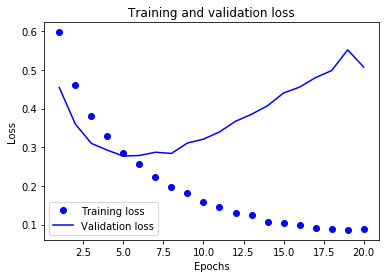

In [43]:
# Model loss plot

import matplotlib.pyplot as plt

drop_loss_values = drop_history_dict['loss']
drop_val_loss_values = drop_history_dict['val_loss']
drop_epochs = range(1, len(drop_history_dict['accuracy']) + 1)

plt.plot(drop_epochs, drop_loss_values, 'bo', label='Training loss')
plt.plot(drop_epochs, drop_val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

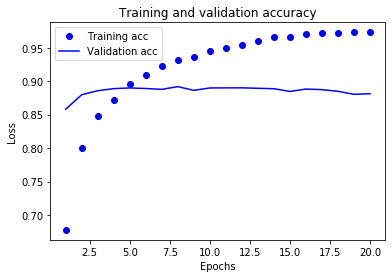

In [44]:
# VALID PLOT

drop_acc_values = drop_history_dict['accuracy']
drop_val_acc_values = drop_history_dict['val_accuracy']
plt.plot(drop_epochs, drop_history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(drop_epochs, drop_history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Dataset Informations

### Bilanciamento
IL DATASET E' BILANCIATO!

In [59]:
print("Percentuale di istanze con label 1 nel dataset:")
print(str(np.count_nonzero(train_labels == 1)*100/len(train_labels)) + "%")
print("Percentuale di istanze con label 0 nel dataset:")
print(str(np.count_nonzero(train_labels == 0)*100/len(train_labels)) + "%")

Percentuale di istanze con label 1 nel dataset:
50.0%
Percentuale di istanze con label 0 nel dataset:
50.0%


### Tipo di Validazione
Abbiamo 5.000 istanze, meglio fare un cross validation!

### Choosing the right last-layer activation and loss function for your model
| Problem type | Last-layer activation | Loss function |
| - | - | - |
| **Binary classification** | ```sigmoid``` | ```binary_crossentropy``` |
| **Multiclass, single-label classification** | ```softmax``` | ```categorical_crossentropy``` |
| **Multiclass, multilabel  classification** | ```sigmoid``` | ```binary_crossentropy``` |
| **Regression to arbitrary values** | ```None``` | ```mse``` |
| **Regression to values between 0 and 1** | ```sigmoid``` | ```mse or binary_crossentropy``` |

### Come gestire il modello

To figure out how big a model you’ll need, you must develop a model that overfits.
This is fairly easy:

* Add layers.
* Make the layers bigger.
* Train for more epochs.

Always monitor the training loss and validation loss, as well as the training and validation values for any metrics you care about. When you see that the model’s performance on the validation data begins to degrade, you’ve achieved overfitting.
The next stage is to start regularizing and tuning the model, to get as close as possible to the ideal model that neither underfits nor overfits.

This step will take the most time: you’ll repeatedly modify your model, train it, evaluate on your validation data (not the test data, at this point), modify it again, and
repeat, until the model is as good as it can get. These are some things you should try:
* Add dropout.
* Try different architectures: add or remove layers.
* Add L1 and/or L2 regularization.
* Try different hyperparameters (such as the number of units per layer or the learning rate of the optimizer) to find the optimal configuration.
* Optionally, iterate on feature engineering: add new features, or remove features that don’t seem to be informative.